# Indian Agricultural Crop Yield Predictions

## Importing Libraries

In [1]:
# loading the library

import pandas as pd                                     # To work on data manipulation 
import numpy as np                                      # It is used for numerical python
import seaborn as sns                                   # For Visualization
import matplotlib.pyplot as plt                         # For Visualization
from sklearn.model_selection import train_test_split    # To split the data (train and test)
from sklearn.linear_model import SGDRegressor           # To build the model (S.G.D)
from sklearn.preprocessing import StandardScaler        # To convert the predictor to the same scale(To scale down the data where mean =0 and std = 1) 
from sklearn.metrics import mean_squared_error          # To find the MSE (error)   To check the performance of your model 
import plotly.express as px
from warnings import filterwarnings

filterwarnings('ignore')


C:\Users\gkish\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Loading the dataset
df = pd.read_csv(r"C:\Users\gkish\Downloads\archive (1)\crop_yield.csv")
df.head()

Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1           2051.4   631643.29    2057.47     0.710435  
2           2051.4    75755.32     246.76     0.238333  
3           2051.4  1870661.52    6093.36  5238.051739  
4           2051.4   165500.63     539.09     0.420909

In [3]:
df.tail()

Crop  Crop_Year       Season              State      Area  \
19684  Small millets       1998  Kharif                Nagaland    4000.0   
19685          Wheat       1998  Rabi                  Nagaland    1000.0   
19686          Maize       1997  Kharif       Jammu and Kashmir  310883.0   
19687           Rice       1997  Kharif       Jammu and Kashmir  275746.0   
19688          Wheat       1997  Rabi         Jammu and Kashmir  239344.0   

       Production  Annual_Rainfall   Fertilizer  Pesticide     Yield  
19684        2000           1498.0    395200.00    1160.00  0.500000  
19685        3000           1498.0     98800.00     290.00  3.000000  
19686      440900           1356.2  29586735.11   96373.73  1.285000  
19687        5488           1356.2  26242746.82   85481.26  0.016667  
19688      392160           1356.2  22778368.48   74196.64  1.261818

In [4]:
print("Shape of the dataset : ",df.shape)

Shape of the dataset :  (19689, 10)


## Preprocessing of the dataset 

In [5]:
df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [7]:
# to check the unique values
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('No of Unique features = ',df[i].nunique())
    print()

Crop
['Arecanut' 'Arhar/Tur' 'Castor seed' 'Coconut ' 'Cotton(lint)'
 'Dry chillies' 'Gram' 'Jute' 'Linseed' 'Maize' 'Mesta' 'Niger seed'
 'Onion' 'Other  Rabi pulses' 'Potato' 'Rapeseed &Mustard' 'Rice'
 'Sesamum' 'Small millets' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Tobacco'
 'Turmeric' 'Wheat' 'Bajra' 'Black pepper' 'Cardamom' 'Coriander' 'Garlic'
 'Ginger' 'Groundnut' 'Horse-gram' 'Jowar' 'Ragi' 'Cashewnut' 'Banana'
 'Soyabean' 'Barley' 'Khesari' 'Masoor' 'Moong(Green Gram)'
 'Other Kharif pulses' 'Safflower' 'Sannhamp' 'Sunflower' 'Urad'
 'Peas & beans (Pulses)' 'other oilseeds' 'Other Cereals' 'Cowpea(Lobia)'
 'Oilseeds total' 'Guar seed' 'Other Summer Pulses' 'Moth']
No of Unique features =  55

Crop_Year
[1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
No of Unique features =  24

Season
['Whole Year ' 'Kharif     ' 'Rabi       ' 'Autumn     ' 'Summer     '
 'Winter     ']
No of Unique features =  6

Stat

In [8]:
# Check the duplicates record
df.duplicated().sum()

0

In [9]:
df.describe()

Crop_Year          Area    Production  Annual_Rainfall  \
count  19689.000000  1.968900e+04  1.968900e+04     19689.000000   
mean    2009.127584  1.799266e+05  1.643594e+07      1437.755177   
std        6.498099  7.328287e+05  2.630568e+08       816.909589   
min     1997.000000  5.000000e-01  0.000000e+00       301.300000   
25%     2004.000000  1.390000e+03  1.393000e+03       940.700000   
50%     2010.000000  9.317000e+03  1.380400e+04      1247.600000   
75%     2015.000000  7.511200e+04  1.227180e+05      1643.700000   
max     2020.000000  5.080810e+07  6.326000e+09      6552.700000   

         Fertilizer     Pesticide         Yield  
count  1.968900e+04  1.968900e+04  19689.000000  
mean   2.410331e+07  4.884835e+04     79.954009  
std    9.494600e+07  2.132874e+05    878.306193  
min    5.417000e+01  9.000000e-02      0.000000  
25%    1.880146e+05  3.567000e+02      0.600000  
50%    1.234957e+06  2.421900e+03      1.030000  
75%    1.000385e+07  2.004170e+04      2.388889  
max    4.835407e+09  1.575051e+07  21105.000000

##  Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

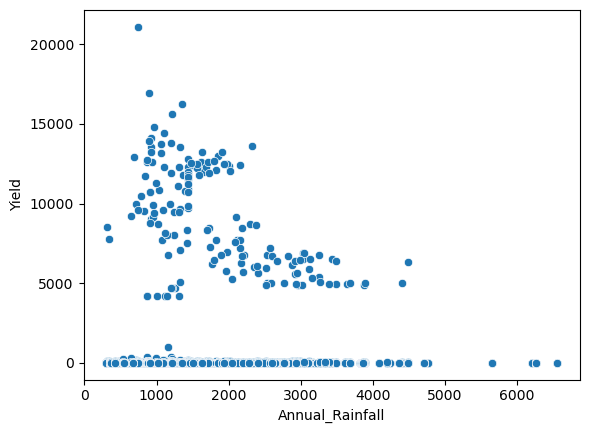

In [10]:
sns.scatterplot(x = df['Annual_Rainfall'], y = df['Yield'])
plt.show

## Year wise analysis of agricultural production

In [11]:
df_year = df[df['Crop_Year']!=2020]  # As the data of 2020 is incomplete


In [12]:
year_yield = df_year.groupby('Crop_Year').sum() 
year_yield

Area   Production  Annual_Rainfall    Fertilizer  \
Crop_Year                                                             
1997       1.660686e+08   6087009873     6.542691e+05  1.580475e+10   
1998       1.501238e+08   7868086697     1.138474e+06  1.483223e+10   
1999       1.470574e+08   8550025528     1.033857e+06  1.560720e+10   
2000       1.475277e+08   9562470060     1.119624e+06  1.448280e+10   
2001       1.456943e+08   9314563490     1.055077e+06  1.487976e+10   
2002       1.427858e+08  12409349456     1.040622e+06  1.351753e+10   
2003       1.496968e+08  12313711969     1.135610e+06  1.481699e+10   
2004       1.480245e+08  13817065380     1.141189e+06  1.603697e+10   
2005       1.479183e+08  14951210018     1.185828e+06  1.773836e+10   
2006       1.522491e+08  15702675600     1.120933e+06  1.944373e+10   
2007       1.524861e+08  14471191552     1.282614e+06  2.034164e+10   
2008       1.509647e+08  16165771744     1.160613e+06  2.159398e+10   
2009       1.486685e+08  16604163998     1.022008e+06  2.316552e+10   
2010       1.581894e+08  11952654246     1.260904e+06  2.627684e+10   
2011       1.544121e+08  19260119964     1.253200e+06  2.586711e+10   
2012       1.585360e+08  13030757834     1.128220e+06  2.390723e+10   
2013       1.575644e+08  17040254359     1.400296e+06  2.276649e+10   
2014       1.544366e+08  17729042495     1.246912e+06  2.331374e+10   
2015       1.559359e+08  18329298670     1.353716e+06  2.462384e+10   
2016       1.603649e+08  16357287264     1.554648e+06  2.457592e+10   
2017       1.625001e+08  15873843241     1.596034e+06  2.558402e+10   
2018       1.613595e+08  17933914698     1.734000e+06  2.617252e+10   
2019       1.690919e+08  18272602364     1.640698e+06  2.904323e+10   

              Pesticide          Yield  
Crop_Year                               
1997       5.148126e+07   26187.756592  
1998       4.353590e+07   36136.246483  
1999       3.970550e+07   50013.419395  
2000       3.835721e+07   58342.279827  
2001       3.788053e+07   56581.195447  
2002       3.569644e+07   65734.814831  
2003       3.592724e+07   67039.368873  
2004       3.108514e+07   63905.917053  
2005       3.106285e+07   70140.586280  
2006       3.349481e+07   63765.246251  
2007       2.439777e+07   63548.814332  
2008       1.358682e+07   72534.452889  
2009       2.527364e+07   74346.506928  
2010       3.796545e+07   62000.578526  
2011       5.095598e+07   76228.823500  
2012       4.914617e+07   68448.386183  
2013       4.254240e+07   92591.163834  
2014       5.096406e+07  103400.057624  
2015       5.145886e+07   82077.740509  
2016       5.612772e+07   80860.122961  
2017       6.175004e+07   79981.909996  
2018       5.647583e+07   79994.686005  
2019       6.256401e+07   80190.867894

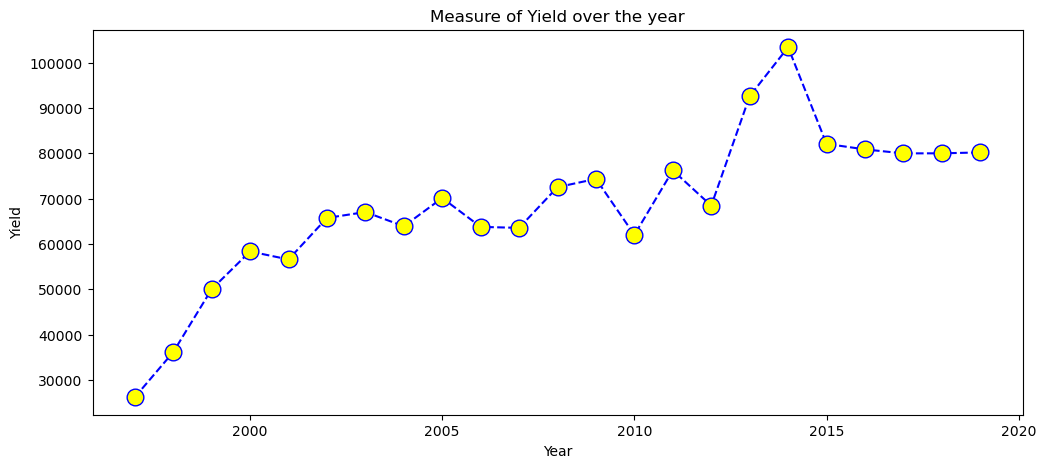

In [13]:
plt.figure(figsize = (12,5))
plt.plot(year_yield.index, year_yield['Yield'],color='blue', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Measure of Yield over the year')
plt.show()

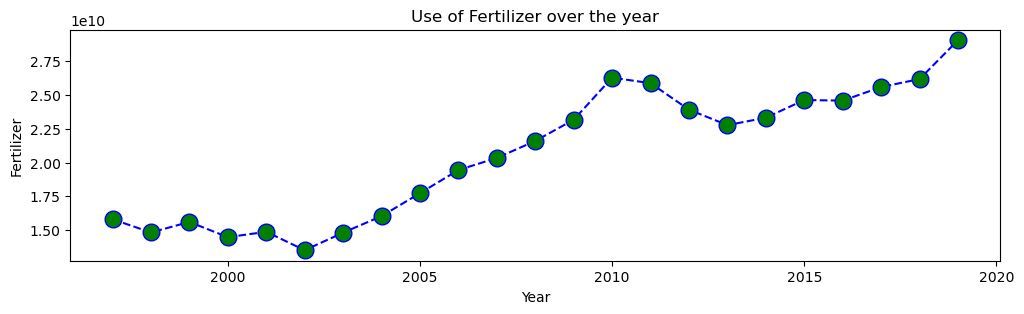

In [14]:
plt.figure(figsize = (12,3))
plt.plot(year_yield.index, year_yield['Fertilizer'],color='blue', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='green')
plt.xlabel('Year')
plt.ylabel('Fertilizer')
plt.title('Use of Fertilizer over the year')
plt.show()

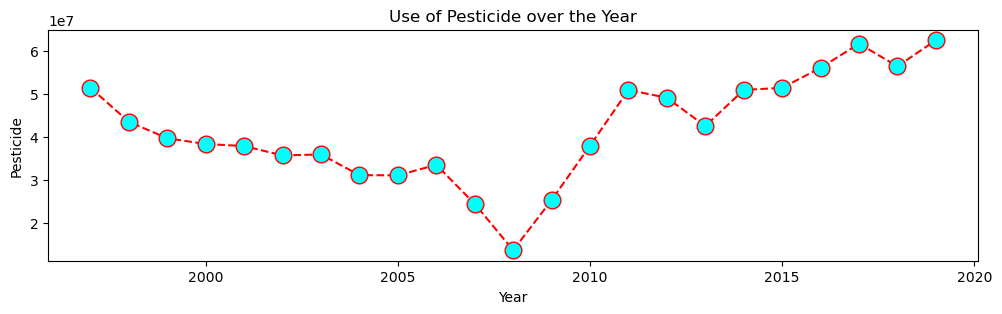

In [15]:
plt.figure(figsize = (12,3))
plt.plot(year_yield.index, year_yield['Pesticide'],color='red', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='cyan')
plt.xlabel('Year')
plt.ylabel('Pesticide')
plt.title('Use of Pesticide over the Year')
plt.show()

## State wise analysis of agricultural production

In [16]:
df_state = df.groupby('State').sum()
df_state.sort_values(by = 'Yield', inplace=True, ascending = False)
df_state

Crop_Year          Area    Production  Annual_Rainfall  \
State                                                                       
West Bengal          2196856  2.376823e+08    8941179120     1.883456e+06   
Puducherry           1346899  6.535410e+05     493815573     9.599160e+05   
Andhra Pradesh       2543550  2.389253e+08   26076218605     1.160140e+06   
Tamil Nadu           1652030  1.103728e+08   78051759253     7.654142e+05   
Assam                1468138  7.734260e+07    3637714928     1.531493e+06   
Karnataka            2876568  2.579074e+08   63772797366     1.692393e+06   
Kerala               1072892  3.639106e+07  129700649853     1.536641e+06   
Goa                   494067  2.749600e+06    2193998349     8.247461e+05   
Telangana             800319  3.979214e+07     147700034     3.955095e+05   
Gujarat              1641081  2.224343e+08     807581678     6.411799e+05   
Uttar Pradesh        1657261  5.426726e+08    4442585302     6.255756e+05   
Haryana              1267508  1.315070e+08     589739640     2.946222e+05   
Maharashtra          1546539  4.619396e+08    1878564915     9.056708e+05   
Bihar                1799058  1.679954e+08     544953534     1.042240e+06   
Madhya Pradesh       1697425  4.920880e+08     834490323     8.478293e+05   
Uttarakhand          1535612  2.247189e+07     179697348     1.087097e+06   
Delhi                 407560  7.979030e+05       2666022     1.284794e+05   
Odisha               1525934  1.246467e+08     194080325     1.098412e+06   
Nagaland             1384791  8.426732e+06      18748702     1.064884e+06   
Manipur               891535  5.727639e+06      18764635     6.868441e+05   
Punjab                797278  1.620402e+08     781551409     2.020578e+05   
Tripura               886679  6.278528e+06      16952054     1.015520e+06   
Meghalaya            1303721  5.178776e+06      16516629     2.623959e+06   
Chhattisgarh         1838861  1.105362e+08     143096606     1.159347e+06   
Himachal Pradesh     1237740  1.781021e+07      32297151     7.068515e+05   
Arunachal Pradesh     586807  5.725531e+06       9522010     7.620470e+05   
Mizoram               835617  1.542189e+06       2769208     1.013275e+06   
Jharkhand             543138  3.043553e+07      43793850     3.194565e+05   
Jammu and Kashmir    1268456  1.874319e+07      30298377     7.520082e+05   
Sikkim                453793  1.759399e+06       2744927     5.808958e+05   

                     Fertilizer     Pesticide          Yield  
State                                                         
West Bengal        2.970480e+10  6.612665e+07  291986.752179  
Puducherry         8.480729e+07  1.705159e+05  232163.600840  
Andhra Pradesh     3.125890e+10  6.210724e+07  229735.184723  
Tamil Nadu         1.473239e+10  2.956305e+07  185813.281648  
Assam              1.029304e+10  2.093547e+07  160612.648362  
Karnataka          3.458024e+10  6.917312e+07  151391.867808  
Kerala             4.744603e+09  9.647595e+06  147710.353263  
Goa                3.581078e+08  7.506114e+05   87275.955000  
Telangana          6.262533e+09  1.356572e+07   39508.727733  
Gujarat            2.993028e+10  6.006711e+07    5471.634563  
Uttar Pradesh      7.245282e+10  1.471335e+08    4168.818513  
Haryana            1.764513e+10  3.571026e+07    3491.154048  
Maharashtra        6.238907e+10  1.246885e+08    3388.793109  
Bihar              2.220212e+10  4.531080e+07    3114.942771  
Madhya Pradesh     6.708800e+10  1.359908e+08    2921.854255  
Uttarakhand        3.126579e+09  6.007196e+06    2853.699791  
Delhi              1.045319e+08  2.108490e+05    2663.090000  
Odisha             1.663862e+10  3.338555e+07    2387.350672  
Nagaland           1.160796e+09  2.321707e+06    2344.345829  
Manipur            8.009821e+08  1.556678e+06    2316.347595  
Punjab             2.165230e+10  4.375276e+07    1926.568436  
Tripura            8.561746e+08  1.712264e+06    1891.456560  
Meghalaya          6.978065e+08  1.423262e

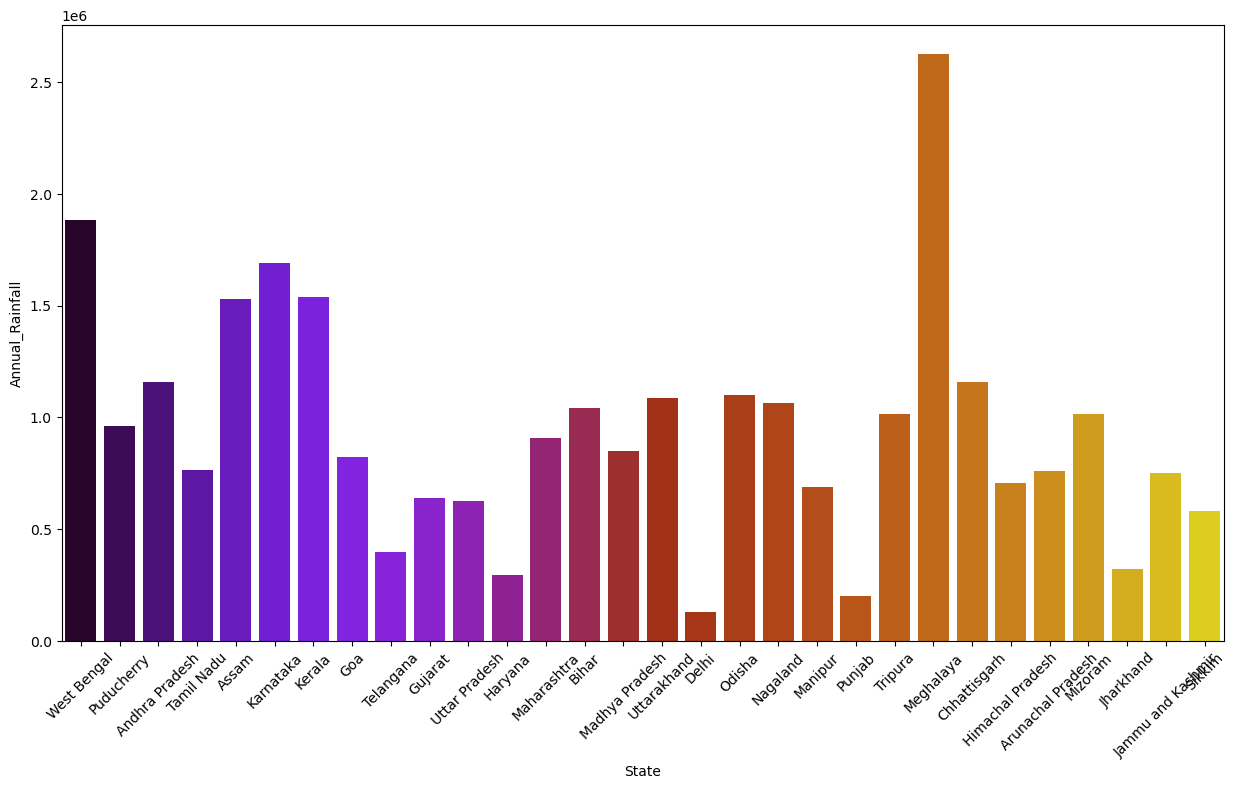

In [17]:
plt.figure(figsize = (15,8))
sns.barplot(x = df_state.index, y=df_state['Annual_Rainfall'], palette = 'gnuplot') 
plt.xticks(rotation = 45)
plt.show()

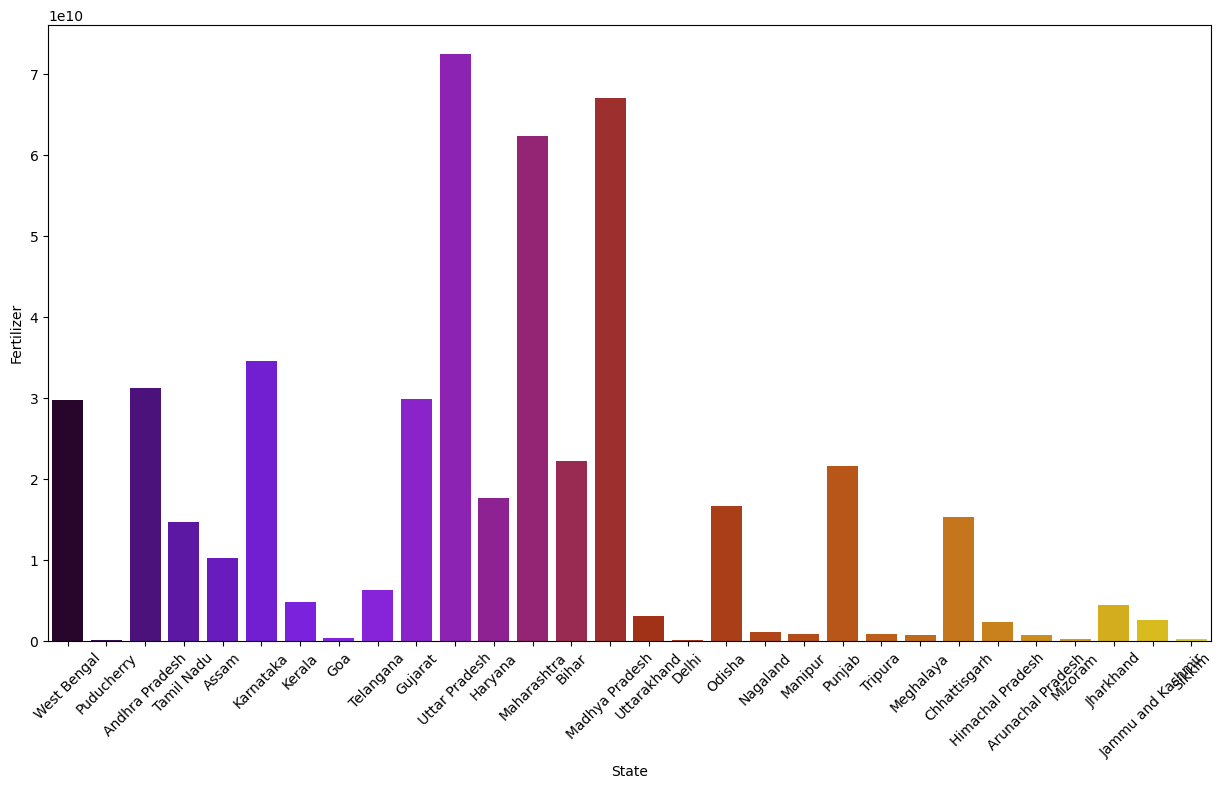

In [18]:
plt.figure(figsize = (15,8))
sns.barplot(x = df_state.index, y=df_state['Fertilizer'], palette = 'gnuplot') 
plt.xticks(rotation = 45)
plt.show()

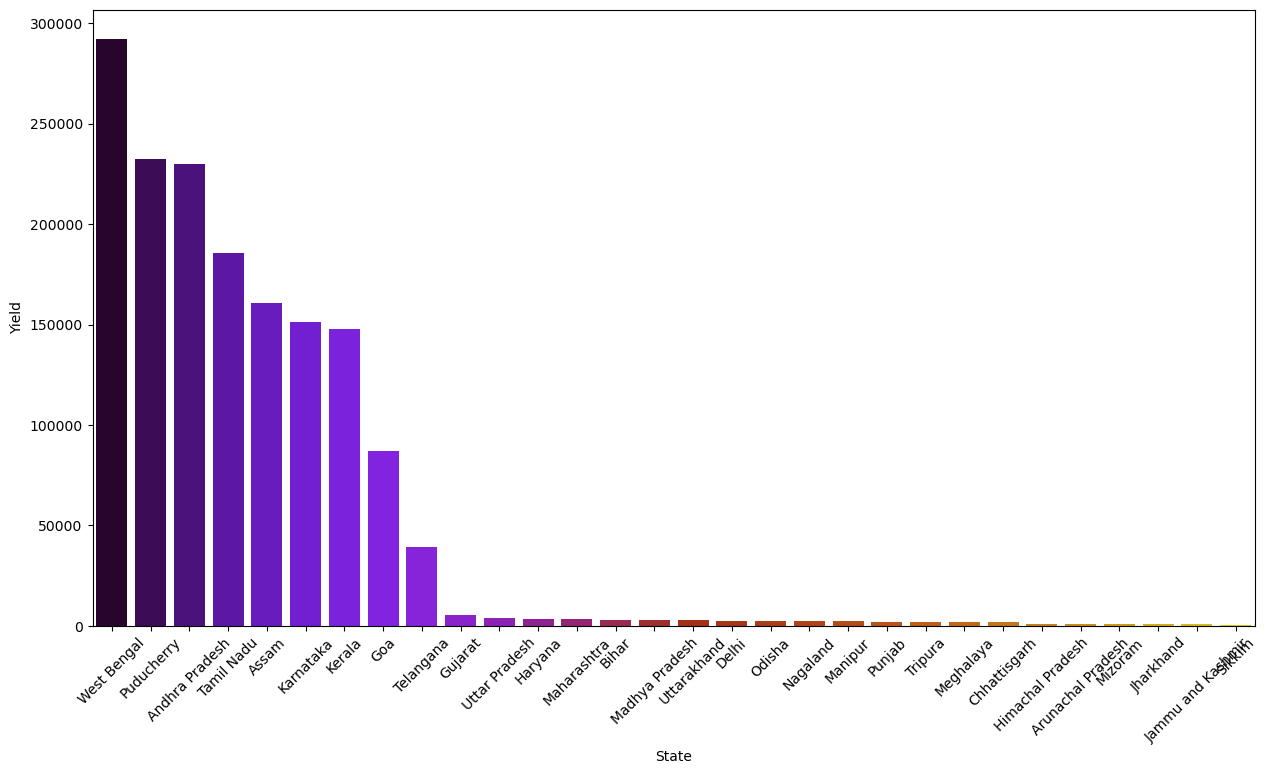

In [19]:
plt.figure(figsize = (15,8))
sns.barplot(x = df_state.index, y=df_state['Yield'], palette = 'gnuplot') 
plt.xticks(rotation = 45)
plt.show()

## Season wise analysis

In [20]:
df_Seas = df[df['Season']!='Whole Year ']

df_season = df_Seas.groupby('Season').sum()
df_season

Crop_Year          Area  Production  Annual_Rainfall  \
Season                                                              
Autumn          832058  5.862637e+07    84406651     7.031759e+05   
Kharif        16538965  1.702742e+09  5402484780     1.131835e+07   
Rabi          11539594  1.172588e+09  2837368229     7.970757e+06   
Summer         2402524  9.879112e+07   243731156     1.565900e+06   
Winter          781718  2.806847e+08   586507936     6.709910e+05   

               Fertilizer     Pesticide         Yield  
Season                                                 
Autumn       7.696200e+09  1.552829e+07   1621.837556  
Kharif       2.282723e+11  4.624902e+08  20431.840607  
Rabi         1.564345e+11  3.218366e+08  11418.068860  
Summer       1.371903e+10  2.732111e+07   3581.857123  
Winter       3.811857e+10  7.590270e+07   2056.746957

In [21]:
fig = px.bar(df_season, y = 'Area', color=df_season.index, hover_data=['Area'],text = 'Area')
fig.show()

In [22]:
fig = px.sunburst(df_season, path=[df_season.index, 'Yield'], values='Yield',
                  color=df_season.index, hover_data=['Yield'])                
fig.show()

## Crop wise Analysis

In [23]:
# Where the Yield is zero
df_yz = df[df['Yield']==0]
df_yz.shape

(112, 10)

In [24]:
df_yz.head()

Crop  Crop_Year       Season           State     Area  \
92          Cardamom       1997  Whole Year      West Bengal   2674.0   
125        Sunflower       1997  Whole Year      West Bengal    278.0   
1058        Soyabean       2002  Kharif       Andhra Pradesh  41284.0   
1134  other oilseeds       2002  Whole Year           Kerala   2253.0   
1135        Arecanut       2002  Whole Year       Tamil Nadu   4956.0   

      Production  Annual_Rainfall  Fertilizer  Pesticide  Yield  
92             7           1852.9   254484.58     828.94    0.0  
125            1           1852.9    26457.26      86.18    0.0  
1058           0            648.1  3908356.28   10321.00    0.0  
1134           0           2511.2   213291.51     563.25    0.0  
1135           0            315.9   469184.52    1239.00    0.0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]),
 [Text(0, 0, 'Arecanut'),
  Text(1, 0, 'Arhar/Tur'),
  Text(2, 0, 'Castor seed'),
  Text(3, 0, 'Coconut '),
  Text(4, 0, 'Cotton(lint)'),
  Text(5, 0, 'Dry chillies'),
  Text(6, 0, 'Gram'),
  Text(7, 0, 'Jute'),
  Text(8, 0, 'Linseed'),
  Text(9, 0, 'Maize'),
  Text(10, 0, 'Mesta'),
  Text(11, 0, 'Niger seed'),
  Text(12, 0, 'Onion'),
  Text(13, 0, 'Other  Rabi pulses'),
  Text(14, 0, 'Potato'),
  Text(15, 0, 'Rapeseed &Mustard'),
  Text(16, 0, 'Rice'),
  Text(17, 0, 'Sesamum'),
  Text(18, 0, 'Small millets'),
  Text(19, 0, 'Sugarcane'),
  Text(20, 0, 'Sweet potato'),
  Text(21, 0, 'Tapioca'),
  Text(22, 0, 'Tobacco'),
  Text(23, 0, 'Turmeric'),
  Text(24, 0, 'Wheat'),
  Text(25, 0, 'Bajra'),
  Text(26, 0, 'Black pepper'),
  Text(27, 0,

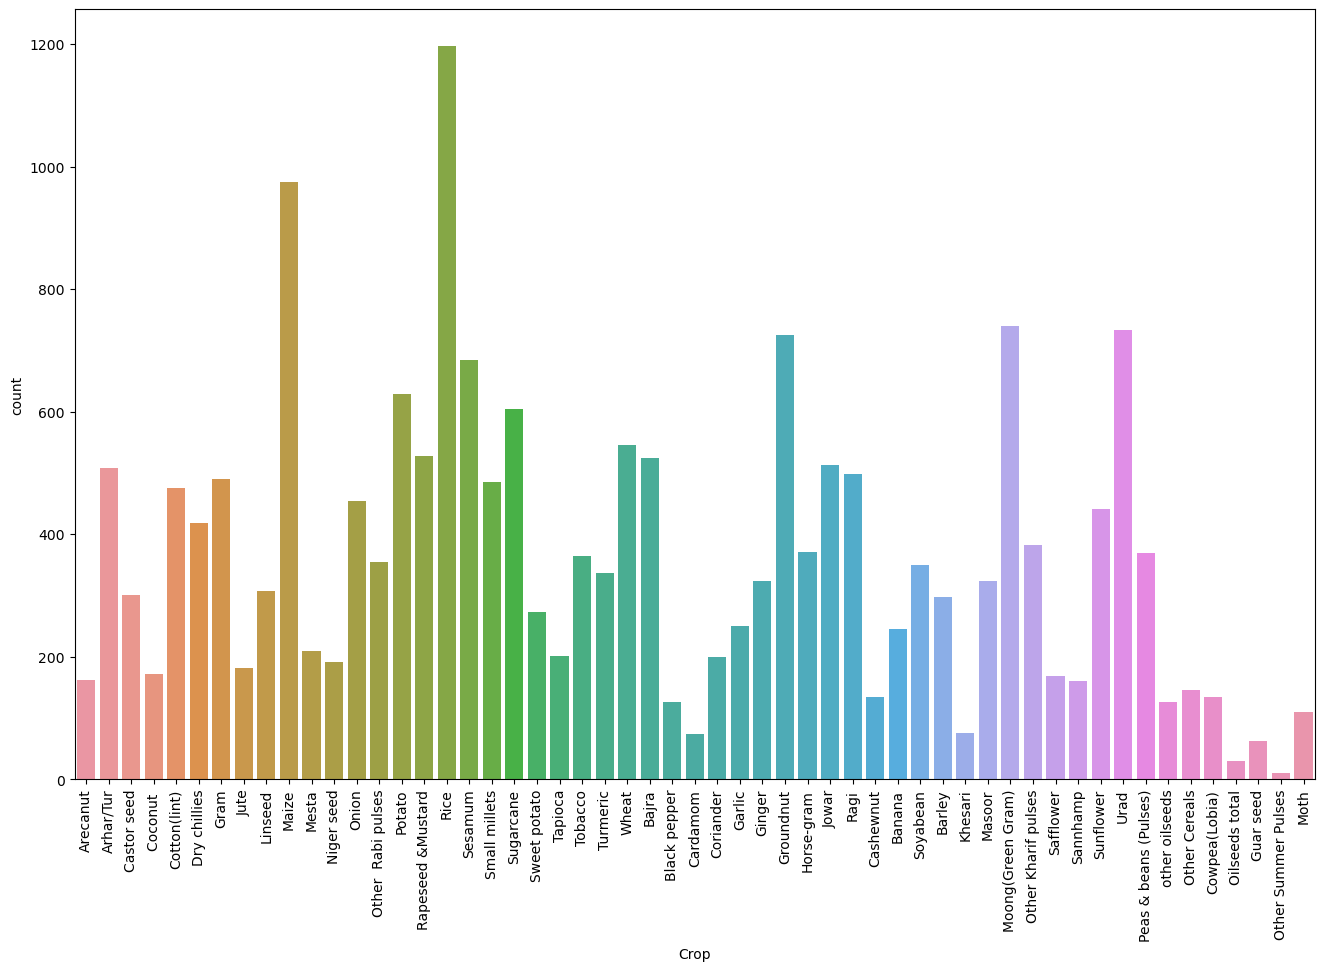

In [25]:
plt.figure(figsize = (16,10))
ax = sns.countplot(data=df,x='Crop')
plt.xticks(rotation=90)

In [26]:
df_ynz = df[df['Yield']>0]  # where yield is more than zero
df_crop = df_ynz.groupby('Crop').sum()
df_crop

Crop_Year          Area    Production  Annual_Rainfall  \
Crop                                                                            
Arecanut                  321347  8.765158e+06      39144261     3.414578e+05   
Arhar/Tur                1020541  8.235357e+07      60913833     7.103078e+05   
Bajra                    1052589  9.335810e+07     118137047     5.566748e+05   
Banana                    488061  7.127321e+06     226471979     4.199956e+05   
Barley                    596557  9.270084e+06      19498687     3.474722e+05   
Black pepper              253163  4.362226e+06       2095650     2.700002e+05   
Cardamom                  146569  1.305532e+06        255490     1.241488e+05   
Cashewnut                 265313  7.472794e+06       3737207     2.581485e+05   
Castor seed               602681  1.659632e+07      24049211     4.144262e+05   
Coconut                   331429  3.845302e+07  308751970278     2.994008e+05   
Coriander                 397906  4.520542e+06       3242496     2.231380e+05   
Cotton(lint)              950038  2.208284e+08     457830976     6.863900e+05   
Cowpea(Lobia)             263939  1.307012e+06        732573     2.030563e+05   
Dry chillies              841584  1.258819e+07      26009838     6.005670e+05   
Garlic                    498296  2.891820e+06      18798851     3.029632e+05   
Ginger                    644944  1.811678e+06      17681841     5.184243e+05   
Gram                      982235  1.454909e+08     134316823     6.360960e+05   
Groundnut                1456642  1.236583e+08     148626325     1.022890e+06   
Guar seed                 122657  6.114917e+06       7227527     4.175860e+04   
Horse-gram                733554  1.218246e+07       5276782     4.252998e+05   
Jowar                    1030385  1.645358e+08     141915435     5.845007e+05   
Jute                      333372  1.813989e+07     230423821     3.289355e+05   
Khesari                   150678  9.973860e+06       7115452     1.025431e+05   
Linseed                   614576  7.764671e+06       3187572     4.391418e+05   
Maize                    1956798  1.576855e+08     410911181     1.372236e+06   
Masoor                    651141  2.631433e+07      19724553     4.436584e+05   
Mesta                     415840  1.854066e+06      14052802     3.670216e+05   
Moong(Green Gram)        1474944  5.193857e+07      22490489     9.410610e+05   
Moth                      216986  1.814217e+06        913750     1.038927e+05   
Niger seed                381651  5.726511e+07      40641053     2.598972e+05   
Oilseeds total             58267  8.571090e+06      17535438     5.698800e+04   
Onion                     898283  8.866855e+06     121700945     5.343738e+05   
Other  Rabi pulses        711285  1.115306e+07       6437766     5.706225e+05   
Other Cereals             293632  1.891235e+06       1661859     1.985347e+05   
Other Kharif pulses       761491  1.208529e+07       5246413     5.775417e+05   
Other Summer Pulses        20174  1.912000e+04          8394     1.416230e+04   
Peas & beans (Pulses)     741588  1.285124e+07      14310509     5.216820e+05   
Potato                   1259981  3.140622e+07     629688035     9.320973e+05   
Ragi                     1000539  3.087742e+07      44215960     6.723370e+05   
Rapeseed &Mustard        1060590  7.206145e+07      78148914     7.781898e+05   
Rice                     2404601  9.918581e+08    2229301180     1.997287e+06   
Safflower                 337522  5.725913e+06       3241790     2.013518e+05   
Sannhamp                  307237  2.809850e+05        419887     1.779660e+05   
Sesamum                  1374333  3.090386e+07      13542969     9.811728e+05   
Small millets             972398  2.164763e+07      13429255     7.320896e+05   
Soyabean                  693309  1.860384e+08     191659664     5.573113e+05   
Sugarcane                1215012  1.027778e+08    7236536755     9.438568e+05   
Sunflower                 883991  2.613792e+07      14

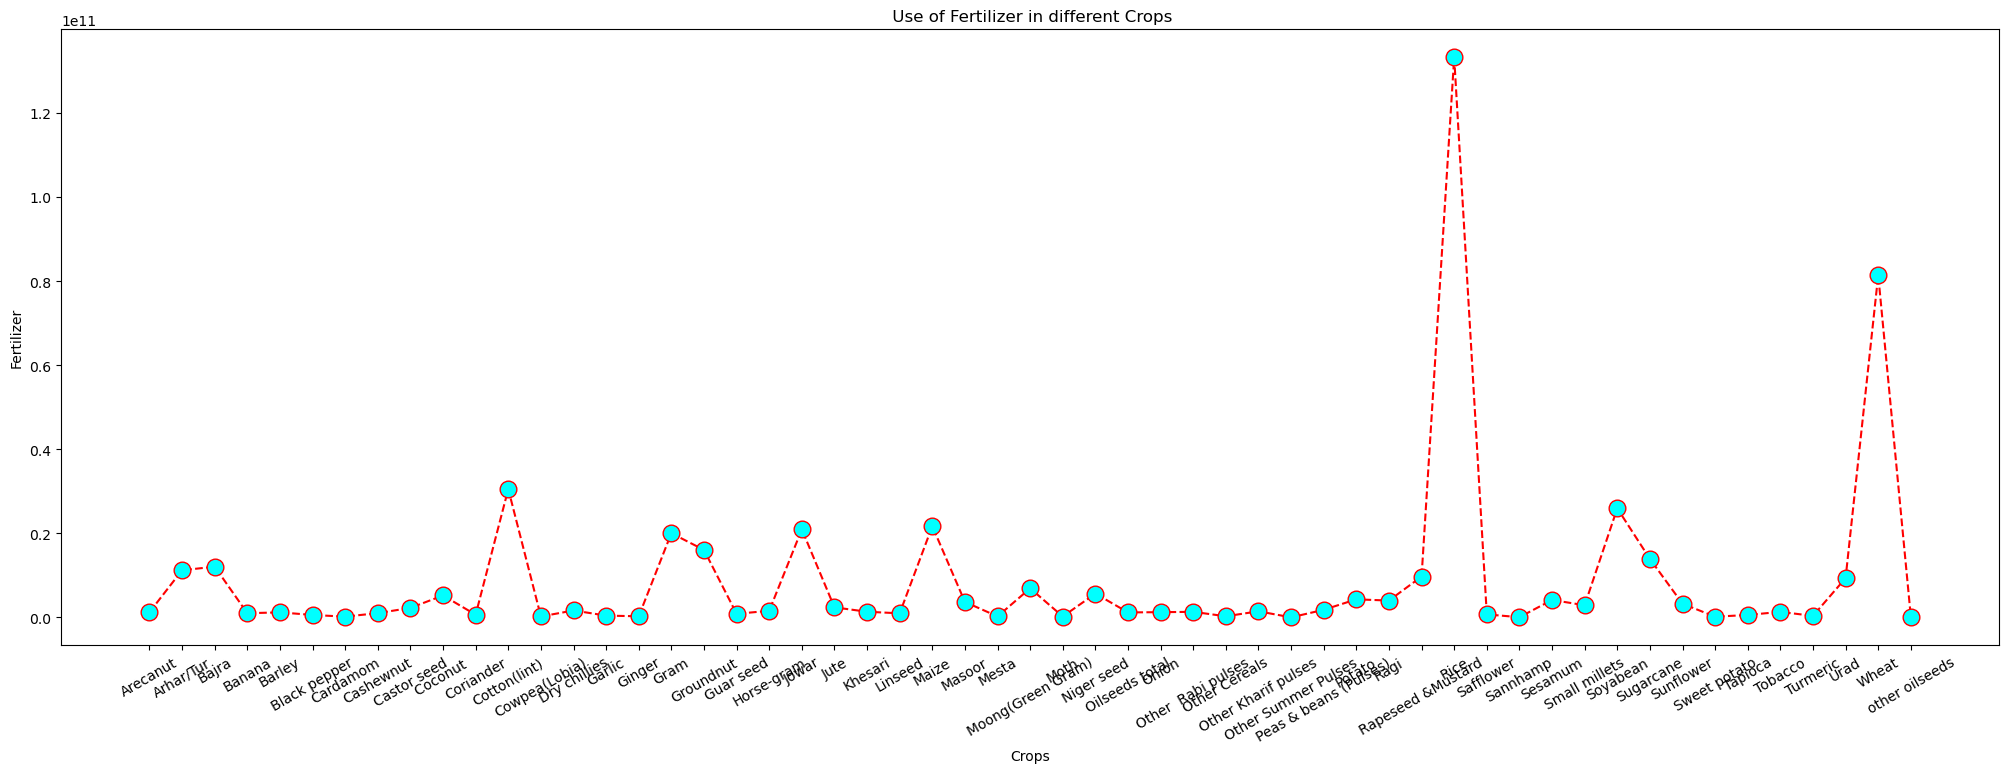

In [27]:
plt.figure(figsize = (25,8))
plt.plot(df_crop.index, df_crop['Fertilizer'],color='red', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='cyan')
plt.xlabel('Crops')
plt.ylabel('Fertilizer')
plt.title(' Use of Fertilizer in different Crops')
plt.xticks(rotation=30)
plt.show()

 The amount of Fertilizer used is maximum in Rice Crop
 The second crop to use more fertilizer is Wheat crop

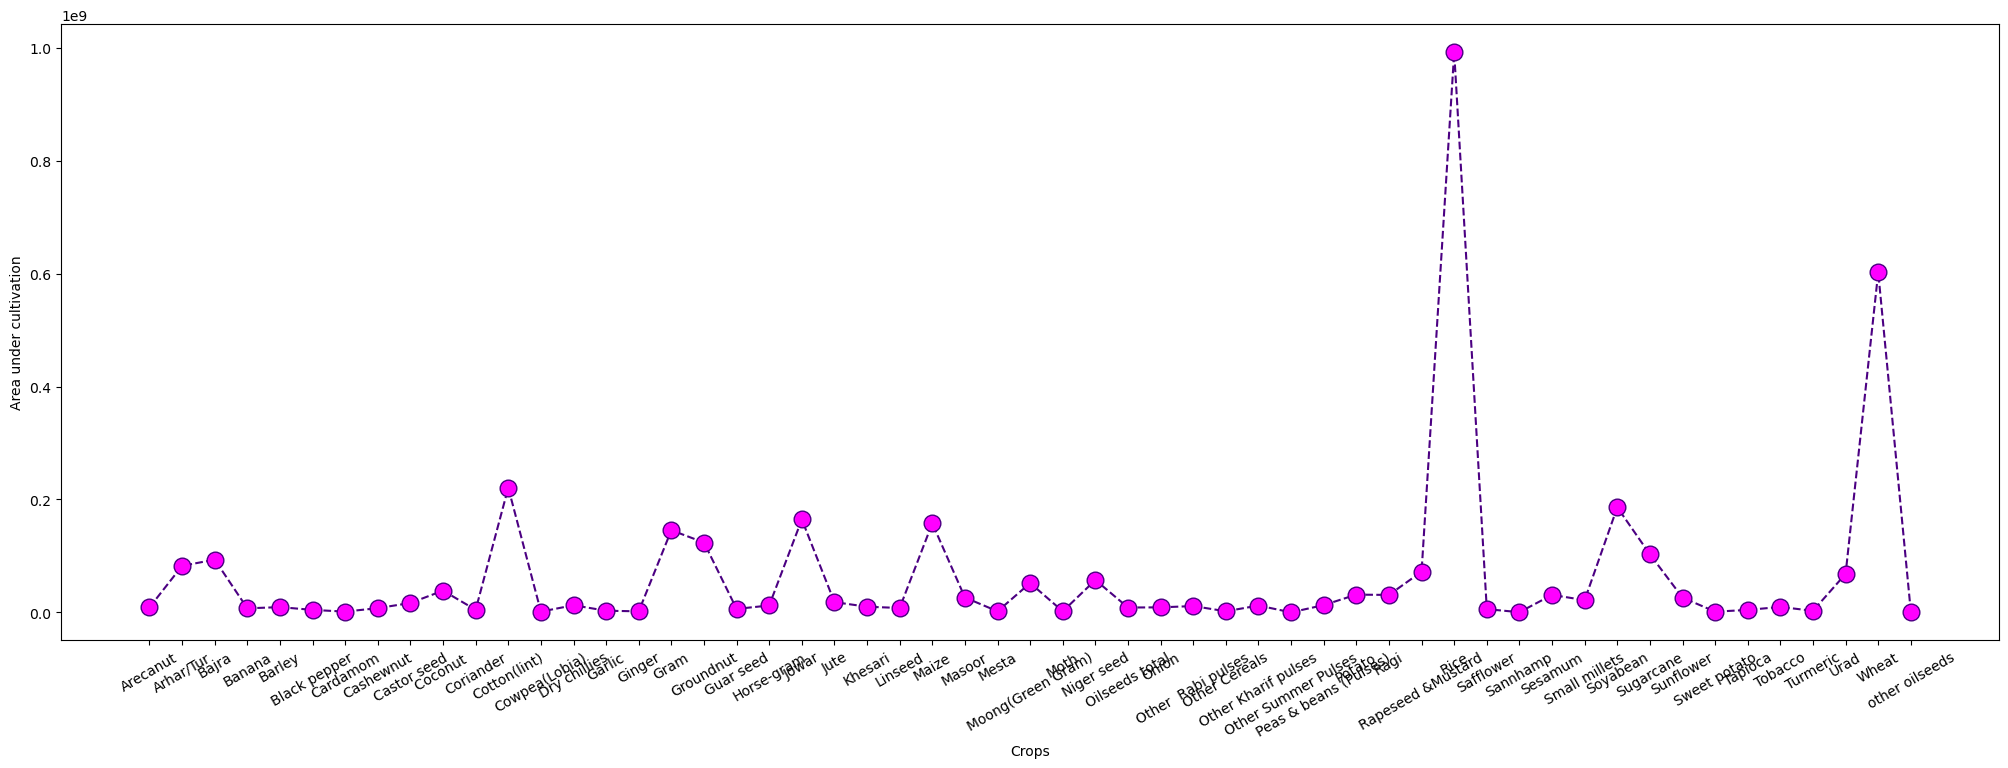

In [28]:
plt.figure(figsize = (25,8))
plt.plot(df_crop.index, df_crop['Area'],color='indigo', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='fuchsia')
plt.xlabel('Crops')
plt.ylabel('Area under cultivation')
plt.xticks(rotation=30)
plt.show()

 Area under cultivation is larger for Rice and Wheat crops

## Analysis of Wheat crop

In [29]:
df_wheat = df[df['Crop']=='Wheat']
df_wheat.reset_index(drop=True,inplace=True)
df_wheat

Crop  Crop_Year       Season              State      Area  Production  \
0    Wheat       1997  Rabi                     Assam   84698.0      110054   
1    Wheat       1997  Rabi                 Karnataka  250698.0      118512   
2    Wheat       1997  Rabi                 Meghalaya    4287.0        6894   
3    Wheat       1997  Rabi               West Bengal  367374.0      810480   
4    Wheat       1998  Rabi                     Assam   89591.0       90509   
..     ...        ...          ...                ...       ...         ...   
540  Wheat       2016  Summer                  Odisha      57.0          80   
541  Wheat       2017  Summer                  Odisha      73.0         158   
542  Wheat       2018  Summer                  Odisha     147.0         268   
543  Wheat       1998  Rabi                  Nagaland    1000.0        3000   
544  Wheat       1997  Rabi         Jammu and Kashmir  239344.0      392160   

     Annual_Rainfall   Fertilizer  Pesticide     Yield  
0             2051.4   8060708.66   26256.38  1.259524  
1             1266.7  23858928.66   77716.38  0.548333  
2             3818.2    407993.79    1328.97  1.385000  
3             1852.9  34962983.58  113885.94  1.886667  
4             2354.4   8851590.80   25981.39  0.999545  
..               ...          ...        ...       ...  
540           1460.5      8735.25      19.95  0.950000  
541           1344.4     11493.12      27.74  2.387143  
542           1635.9     23843.40      51.45  1.825000  
543           1498.0     98800.00     290.00  3.000000  
544           1356.2  22778368.48   74196.64  1.261818  

[545 rows x 10 columns]

In [30]:
df_wheat1 = df_wheat[df_wheat['Crop_Year']!=2020]
df_wheat_year = df_wheat1.groupby('Crop_Year').sum()
df_wheat_year

Area  Production  Annual_Rainfall    Fertilizer  \
Crop_Year                                                           
1997       23500898.00    57999331     26765.700000  2.236580e+09   
1998       24431921.00    63793372     36709.200000  2.413874e+09   
1999       24503856.00    69250974     24912.400000  2.600594e+09   
2000       23338921.00    64029373     32021.900000  2.291182e+09   
2001       24027129.00    66343193     30835.900000  2.453891e+09   
2002       23410674.69    60953946     30737.700000  2.216289e+09   
2003       24734430.70    66979279     34939.400000  2.448214e+09   
2004       24789592.58    63933294     35241.300000  2.685704e+09   
2005       24101857.23    61514930     34308.900000  2.890295e+09   
2006       25628234.04    70106630     30433.900000  3.272982e+09   
2007       25687889.72    72892663     37388.800000  3.426764e+09   
2008       25550851.34    74460169     32756.100000  3.654794e+09   
2009       26099513.00    73479325     27318.300000  4.066826e+09   
2010       27098934.00    83070916     34897.000000  4.501404e+09   
2011       27177143.00    92948338     33900.634633  4.552715e+09   
2012       27145258.00    89368623     33557.500000  4.093505e+09   
2013       28431210.00    92029326     35395.100000  4.108026e+09   
2014       27843326.00    75131504     34660.800000  4.203228e+09   
2015       27235725.00    84000396     36677.200000  4.300793e+09   
2016       28435104.00   101113982     41145.900000  4.357680e+09   
2017       27554664.50   100351926     41521.563636  4.338206e+09   
2018       28938746.65   107544781     43637.900000  4.693865e+09   
2019       32311773.00   118521230     39889.800000  5.549870e+09   

              Pesticide      Yield  
Crop_Year                           
1997       7.285278e+06  27.898176  
1998       7.085257e+06  37.380180  
1999       6.616041e+06  36.165537  
2000       6.068119e+06  40.728373  
2001       6.247054e+06  41.967366  
2002       5.852669e+06  42.687343  
2003       5.936263e+06  43.222580  
2004       5.205814e+06  44.138495  
2005       5.061390e+06  40.127099  
2006       5.638211e+06  43.933819  
2007       4.110062e+06  46.235590  
2008       2.299577e+06  46.625985  
2009       4.436917e+06  45.810705  
2010       6.503744e+06  50.455727  
2011       8.968457e+06  53.370097  
2012       8.415030e+06  53.528222  
2013       7.676427e+06  52.697028  
2014       9.188298e+06  54.542156  
2015       8.987789e+06  54.497607  
2016       9.952286e+06  57.802269  
2017       1.047077e+07  60.863617  
2018       1.012856e+07  59.039009  
2019       1.195536e+07  56.838975

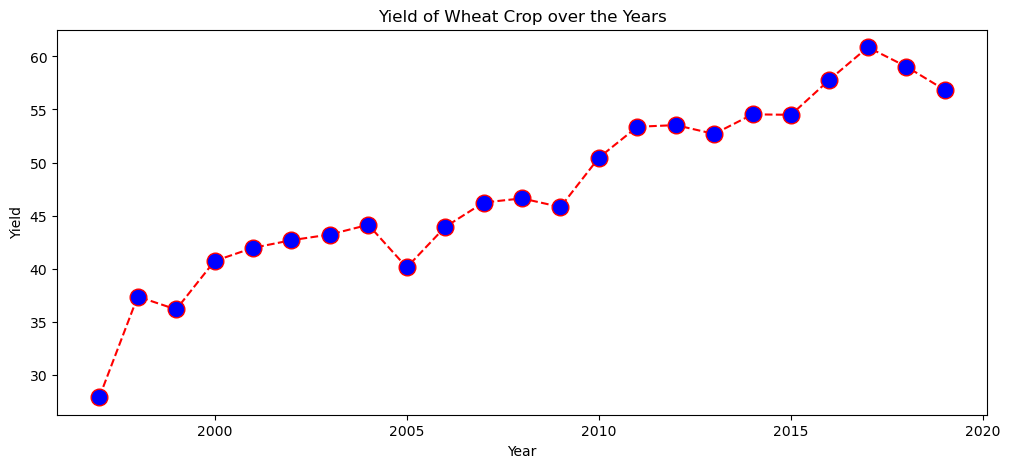

In [31]:
plt.figure(figsize = (12,5))
plt.plot(df_wheat_year.index, df_wheat_year['Yield'],color='red', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='blue')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Yield of Wheat Crop over the Years')
plt.show()

## Modelling 

In [32]:
df1 = df.copy()
df1 = df1.drop(['Crop_Year','Pesticide'], axis = 1)

## One-Hot Encoding

In [33]:
category_columns = df1.select_dtypes(include = ['object']).columns
category_columns

Index(['Crop', 'Season', 'State'], dtype='object')

In [34]:
df1 = pd.get_dummies(df1, columns = category_columns, drop_first=True)

In [35]:
df1.shape

(19689, 93)

In [36]:
df1.head()

Area  Production  Annual_Rainfall  Fertilizer        Yield  \
0  73814.0       56708           2051.4  7024878.38     0.796087   
1   6637.0        4685           2051.4   631643.29     0.710435   
2    796.0          22           2051.4    75755.32     0.238333   
3  19656.0   126905000           2051.4  1870661.52  5238.051739   
4   1739.0         794           2051.4   165500.63     0.420909   

   Crop_Arhar/Tur  Crop_Bajra  Crop_Banana  Crop_Barley  Crop_Black pepper  \
0               0           0            0            0                  0   
1               1           0            0            0                  0   
2               0           0            0            0                  0   
3               0           0            0            0                  0   
4               0           0            0            0                  0   

   ...  State_Odisha  State_Puducherry  State_Punjab  State_Sikkim  \
0  ...             0                 0             0             0   
1  ...             0                 0             0             0   
2  ...             0                 0             0             0   
3  ...             0                 0             0             0   
4  ...             0                 0             0             0   

   State_Tamil Nadu  State_Telangana  State_Tripura  State_Uttar Pradesh  \
0                 0                0              0                    0   
1                 0                0              0                    0   
2                 0                0              0                    0   
3                 0                0              0                    0   
4                 0                0              0                    0   

   State_Uttarakhand  State_West Bengal  
0                  0                  0  
1                  0                  0  
2                  0                  0  
3                  0                  0  
4                  0                  0  

[5 rows x 93 columns]

## Split the data into dependent and independent variable

In [37]:
x = df1.drop(['Yield'], axis = 1)
y = df1[['Yield']]

In [38]:
print(x.shape)
y.shape

(19689, 92)


(19689, 1)

In [39]:
x.head()

Area  Production  Annual_Rainfall  Fertilizer  Crop_Arhar/Tur  \
0  73814.0       56708           2051.4  7024878.38               0   
1   6637.0        4685           2051.4   631643.29               1   
2    796.0          22           2051.4    75755.32               0   
3  19656.0   126905000           2051.4  1870661.52               0   
4   1739.0         794           2051.4   165500.63               0   

   Crop_Bajra  Crop_Banana  Crop_Barley  Crop_Black pepper  Crop_Cardamom  \
0           0            0            0                  0              0   
1           0            0            0                  0              0   
2           0            0            0                  0              0   
3           0            0            0                  0              0   
4           0            0            0                  0              0   

   ...  State_Odisha  State_Puducherry  State_Punjab  State_Sikkim  \
0  ...             0                 0             0             0   
1  ...             0                 0             0             0   
2  ...             0                 0             0             0   
3  ...             0                 0             0             0   
4  ...             0                 0             0             0   

   State_Tamil Nadu  State_Telangana  State_Tripura  State_Uttar Pradesh  \
0                 0                0              0                    0   
1                 0                0              0                    0   
2                 0                0              0                    0   
3                 0                0              0                    0   
4                 0                0              0                    0   

   State_Uttarakhand  State_West Bengal  
0                  0                  0  
1                  0                  0  
2                  0                  0  
3                  0                  0  
4                  0                  0  

[5 rows x 92 columns]

In [40]:
y.head()

Yield
0     0.796087
1     0.710435
2     0.238333
3  5238.051739
4     0.420909

## Splitting  the data set into train and test set

In [41]:
#split the data into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test,=train_test_split(x,y,test_size=0.20,random_state=0) 

In [42]:
x_train.head()

Area  Production  Annual_Rainfall   Fertilizer  Crop_Arhar/Tur  \
1554    23981.0        2810           1117.7   2598101.54               0   
18271      45.0          18           1279.1      7084.80               0   
10095  247000.0    20182000           1004.2  32949800.00               0   
2113   554193.0      584337           1146.3  70775988.03               0   
18009  289964.0      462422           1116.7  43726571.20               0   

       Crop_Bajra  Crop_Banana  Crop_Barley  Crop_Black pepper  Crop_Cardamom  \
1554            0            0            0                  0              0   
18271           0            0            0                  0              0   
10095           0            0            0                  0              0   
2113            0            0            0                  0              0   
18009           0            0            0                  0              0   

       ...  State_Odisha  State_Puducherry  State_Punjab  State_Sikkim  \
1554   ...             0                 0             0             0   
18271  ...             0                 0             0             0   
10095  ...             0                 0             0             0   
2113   ...             0                 0             0             0   
18009  ...             0                 0             0             0   

       State_Tamil Nadu  State_Telangana  State_Tripura  State_Uttar Pradesh  \
1554                  0                0              0                    0   
18271                 0                0              0                    0   
10095                 0                0              0                    0   
2113                  0                0              0                    0   
18009                 0                0              0                    0   

       State_Uttarakhand  State_West Bengal  
1554                   0                  0  
18271                  0                  0  
10095                  0                  0  
2113                   0                  0  
18009                  0                  0  

[5 rows x 92 columns]

In [43]:
from sklearn.preprocessing import StandardScaler

sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)    #only for train we use fit
x_test=sc_x.transform(x_test)          # don't use fit for test data

In [44]:
print('x_train =',x_train.shape)
print('x_test =',x_test.shape)
print('y_train =',y_train.shape)
print('y_test =',y_test.shape)

x_train = (15751, 92)
x_test = (3938, 92)
y_train = (15751, 1)
y_test = (3938, 1)


## SGD Regression

In [45]:
# after standartizing build the model
# building the model
from sklearn.linear_model import SGDRegressor
sgdr=SGDRegressor()
sgdr.fit(x_train,y_train)
score=sgdr.score(x_train,y_train)
print('R-squared =',score)

R-squared = 0.8325920181451297


In [46]:
from sklearn.metrics import r2_score
y_test_pred=sgdr.predict(x_test)
y_train_pred=sgdr.predict(x_train)
r2_train=r2_score(y_train,y_train_pred)*100
r2_test=r2_score(y_test,y_test_pred)*100
print('r2_train =',r2_train)
print('r2_test =',r2_test)



r2_train = 83.25920181451298
r2_test = 82.57114324094744


In [47]:
# prediction
y_pred=sgdr.predict(x_test)

# evaluating the prediction

from sklearn.metrics import mean_squared_error          # to find the MSE (error)
mse=mean_squared_error(y_test,y_pred)
print('MSE =',mse)
print('RMSE =',np.sqrt(mse))


MSE = 135136.3165428008
RMSE = 367.6089179315442


## Linear regression

In [48]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
train_pred=lr.predict(x_train)
test_pred=lr.predict(x_test)

#Now will check the MSE of the model
train_mse=mean_squared_error(y_train,train_pred)
test_mse=mean_squared_error(y_test,test_pred)
print('train_mse =',train_mse)
print('test_mse =',test_mse)

# Now will check the r2_score 
train_r2_score=r2_score(y_train,train_pred)*100
test_r2_score=r2_score(y_test,test_pred)*100
print('train_r2_score =',train_r2_score)
print('test_r2_score =',test_r2_score)


train_mse = 121976.0289881363
test_mse = 118813.9992300747
train_r2_score = 84.16683395943613
test_r2_score = 84.67627188213848


## Random Forest

In [49]:
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [50]:
model1 = RandomForestRegressor(n_estimators=100,random_state=0)
model1.fit(x_train,y_train)
y_train_pred=model1.predict(x_train)
y_test_pred=model1.predict(x_test)

In [51]:
from sklearn.metrics import mean_squared_error,r2_score
train_mse=mean_squared_error(y_train,y_train_pred)
test_mse=mean_squared_error(y_test,y_test_pred)
print(f'MSE_y_train ={train_mse}')
print(f'MSE_y_test ={test_mse}')
print(f'RMSE_y_train ={np.sqrt(train_mse)}')
print(f'RMSE_y_test ={np.sqrt(test_mse)}')
print(f'train_r-squared ={r2_score(y_train,y_train_pred)*100}')
print(f'test_r-squared ={r2_score(y_test,y_test_pred)*100}')

MSE_y_train =3320.5737038941083
MSE_y_test =31706.796325477226
RMSE_y_train =57.62441933671964
RMSE_y_test =178.064023108199
train_r-squared =99.568971090141
test_r-squared =95.91069798568788


## Support Vector Regressor

In [55]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)

y_pred_train_svr= svr.predict(x_train)
y_pred_test_svr = svr.predict(x_test)
# Calculate MSE
mse_train = mean_squared_error(y_train, y_pred_train_svr)
mse_test = mean_squared_error(y_test, y_pred_test_svr)

# Calculate RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print("Training MSE:", mse_train)
print("Test MSE:", mse_test)

print("Training RMSE:", rmse_train)
print("Test RMSE:", rmse_test)

print("Training Accuracy : ",r2_score(y_train, y_pred_train_svr)*100)
print("Test Accuracy : ",r2_score(y_test, y_pred_test_svr)*100)



Training MSE: 769489.9924684486
Test MSE: 774450.3511549251
Training RMSE: 877.2057868416331
Test RMSE: 880.0286081457381
Training Accuracy :  0.11592508483637687
Test Accuracy :  0.11726986059977795


## CatBoostRegressor

In [53]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor(learning_rate=0.15)
cat.fit(x_train, y_train)

y_pred_train_cat = cat.predict(x_train)
y_pred_test_cat = cat.predict(x_test)

print("Training Accuracy : ",r2_score(y_train, y_pred_train_cat))
print()
print("Test Accuracy : ",r2_score(y_test, y_pred_test_cat))


0:	learn: 766.7607135	total: 178ms	remaining: 2m 57s
1:	learn: 666.7125208	total: 188ms	remaining: 1m 34s
2:	learn: 583.5268296	total: 197ms	remaining: 1m 5s
3:	learn: 511.2493282	total: 205ms	remaining: 51s
4:	learn: 450.1660912	total: 212ms	remaining: 42.3s
5:	learn: 399.0367201	total: 220ms	remaining: 36.5s
6:	learn: 351.4542867	total: 228ms	remaining: 32.4s
7:	learn: 314.8328501	total: 237ms	remaining: 29.4s
8:	learn: 282.6322656	total: 245ms	remaining: 26.9s
9:	learn: 255.8958565	total: 251ms	remaining: 24.9s
10:	learn: 231.9280595	total: 257ms	remaining: 23.1s
11:	learn: 214.2923714	total: 265ms	remaining: 21.8s
12:	learn: 196.5338814	total: 277ms	remaining: 21s
13:	learn: 182.9279935	total: 285ms	remaining: 20.1s
14:	learn: 172.3950794	total: 295ms	remaining: 19.3s
15:	learn: 163.1425554	total: 304ms	remaining: 18.7s
16:	learn: 155.3960156	total: 314ms	remaining: 18.1s
17:	learn: 148.9728329	total: 324ms	remaining: 17.7s
18:	learn: 142.9078199	total: 333ms	remaining: 17.2s
19:	l

164:	learn: 42.6857809	total: 1.97s	remaining: 9.96s
165:	learn: 42.5711623	total: 1.98s	remaining: 9.95s
166:	learn: 42.3314561	total: 1.99s	remaining: 9.93s
167:	learn: 42.0316770	total: 2s	remaining: 9.9s
168:	learn: 41.7451497	total: 2.01s	remaining: 9.89s
169:	learn: 41.6396281	total: 2.03s	remaining: 9.9s
170:	learn: 41.6015199	total: 2.04s	remaining: 9.91s
171:	learn: 41.3047935	total: 2.06s	remaining: 9.92s
172:	learn: 41.2370498	total: 2.08s	remaining: 9.92s
173:	learn: 41.0576646	total: 2.09s	remaining: 9.92s
174:	learn: 40.9710092	total: 2.1s	remaining: 9.89s
175:	learn: 40.6960120	total: 2.1s	remaining: 9.86s
176:	learn: 40.4389274	total: 2.11s	remaining: 9.83s
177:	learn: 40.3268156	total: 2.12s	remaining: 9.8s
178:	learn: 40.2419767	total: 2.14s	remaining: 9.8s
179:	learn: 39.9094819	total: 2.15s	remaining: 9.8s
180:	learn: 39.7171997	total: 2.17s	remaining: 9.81s
181:	learn: 39.6404629	total: 2.18s	remaining: 9.81s
182:	learn: 39.5410125	total: 2.2s	remaining: 9.81s
183:

325:	learn: 26.0229684	total: 3.56s	remaining: 7.36s
326:	learn: 26.0018982	total: 3.57s	remaining: 7.34s
327:	learn: 25.9089325	total: 3.57s	remaining: 7.32s
328:	learn: 25.8890270	total: 3.58s	remaining: 7.3s
329:	learn: 25.8037704	total: 3.59s	remaining: 7.29s
330:	learn: 25.7996189	total: 3.6s	remaining: 7.27s
331:	learn: 25.7612022	total: 3.61s	remaining: 7.26s
332:	learn: 25.7222200	total: 3.62s	remaining: 7.24s
333:	learn: 25.6989110	total: 3.62s	remaining: 7.23s
334:	learn: 25.5602795	total: 3.63s	remaining: 7.21s
335:	learn: 25.4741479	total: 3.64s	remaining: 7.2s
336:	learn: 25.4162731	total: 3.65s	remaining: 7.19s
337:	learn: 25.1697347	total: 3.66s	remaining: 7.17s
338:	learn: 25.1181776	total: 3.67s	remaining: 7.16s
339:	learn: 25.0911113	total: 3.68s	remaining: 7.15s
340:	learn: 25.0803018	total: 3.69s	remaining: 7.13s
341:	learn: 24.9991338	total: 3.7s	remaining: 7.12s
342:	learn: 24.9286198	total: 3.71s	remaining: 7.11s
343:	learn: 24.8469287	total: 3.72s	remaining: 7.0

489:	learn: 18.2641569	total: 5.34s	remaining: 5.55s
490:	learn: 18.2484309	total: 5.34s	remaining: 5.54s
491:	learn: 18.2268356	total: 5.35s	remaining: 5.52s
492:	learn: 18.1653357	total: 5.36s	remaining: 5.51s
493:	learn: 18.1473724	total: 5.37s	remaining: 5.5s
494:	learn: 18.1215018	total: 5.38s	remaining: 5.49s
495:	learn: 18.1112244	total: 5.4s	remaining: 5.48s
496:	learn: 18.0962163	total: 5.41s	remaining: 5.47s
497:	learn: 18.0909706	total: 5.42s	remaining: 5.46s
498:	learn: 18.0842836	total: 5.43s	remaining: 5.45s
499:	learn: 18.0809444	total: 5.44s	remaining: 5.44s
500:	learn: 18.0774346	total: 5.45s	remaining: 5.43s
501:	learn: 18.0256117	total: 5.46s	remaining: 5.42s
502:	learn: 18.0114101	total: 5.48s	remaining: 5.41s
503:	learn: 17.9569739	total: 5.49s	remaining: 5.41s
504:	learn: 17.9049228	total: 5.51s	remaining: 5.4s
505:	learn: 17.8786820	total: 5.53s	remaining: 5.39s
506:	learn: 17.8683533	total: 5.54s	remaining: 5.39s
507:	learn: 17.8627132	total: 5.56s	remaining: 5.

660:	learn: 13.6468620	total: 7.14s	remaining: 3.66s
661:	learn: 13.6358006	total: 7.15s	remaining: 3.65s
662:	learn: 13.6132875	total: 7.16s	remaining: 3.64s
663:	learn: 13.5938199	total: 7.18s	remaining: 3.63s
664:	learn: 13.5758313	total: 7.19s	remaining: 3.62s
665:	learn: 13.5726468	total: 7.21s	remaining: 3.61s
666:	learn: 13.5623768	total: 7.22s	remaining: 3.6s
667:	learn: 13.5414566	total: 7.24s	remaining: 3.6s
668:	learn: 13.4688473	total: 7.25s	remaining: 3.59s
669:	learn: 13.4489381	total: 7.26s	remaining: 3.58s
670:	learn: 13.4332792	total: 7.27s	remaining: 3.56s
671:	learn: 13.4264834	total: 7.28s	remaining: 3.55s
672:	learn: 13.3627639	total: 7.29s	remaining: 3.54s
673:	learn: 13.3517689	total: 7.29s	remaining: 3.53s
674:	learn: 13.3145199	total: 7.3s	remaining: 3.52s
675:	learn: 13.3040251	total: 7.32s	remaining: 3.51s
676:	learn: 13.3014049	total: 7.33s	remaining: 3.5s
677:	learn: 13.2429375	total: 7.34s	remaining: 3.49s
678:	learn: 13.2007163	total: 7.35s	remaining: 3.4

816:	learn: 9.9149715	total: 8.94s	remaining: 2s
817:	learn: 9.8590051	total: 8.95s	remaining: 1.99s
818:	learn: 9.8511209	total: 8.95s	remaining: 1.98s
819:	learn: 9.8434081	total: 8.96s	remaining: 1.97s
820:	learn: 9.8414541	total: 8.97s	remaining: 1.96s
821:	learn: 9.8363438	total: 8.98s	remaining: 1.95s
822:	learn: 9.8162956	total: 8.99s	remaining: 1.93s
823:	learn: 9.8093133	total: 9s	remaining: 1.92s
824:	learn: 9.8016230	total: 9.01s	remaining: 1.91s
825:	learn: 9.7963479	total: 9.02s	remaining: 1.9s
826:	learn: 9.7652622	total: 9.02s	remaining: 1.89s
827:	learn: 9.7603450	total: 9.03s	remaining: 1.88s
828:	learn: 9.7498058	total: 9.04s	remaining: 1.86s
829:	learn: 9.7240426	total: 9.04s	remaining: 1.85s
830:	learn: 9.7147903	total: 9.05s	remaining: 1.84s
831:	learn: 9.6817618	total: 9.06s	remaining: 1.83s
832:	learn: 9.6745483	total: 9.06s	remaining: 1.82s
833:	learn: 9.6444030	total: 9.07s	remaining: 1.81s
834:	learn: 9.6178438	total: 9.08s	remaining: 1.79s
835:	learn: 9.61183

979:	learn: 8.0217700	total: 10.7s	remaining: 219ms
980:	learn: 7.9974940	total: 10.8s	remaining: 208ms
981:	learn: 7.9915115	total: 10.8s	remaining: 197ms
982:	learn: 7.9689408	total: 10.8s	remaining: 187ms
983:	learn: 7.9479995	total: 10.8s	remaining: 176ms
984:	learn: 7.9285694	total: 10.8s	remaining: 165ms
985:	learn: 7.9105417	total: 10.8s	remaining: 154ms
986:	learn: 7.8938156	total: 10.9s	remaining: 143ms
987:	learn: 7.8896953	total: 10.9s	remaining: 132ms
988:	learn: 7.8846077	total: 10.9s	remaining: 121ms
989:	learn: 7.8810000	total: 10.9s	remaining: 110ms
990:	learn: 7.8689192	total: 10.9s	remaining: 98.9ms
991:	learn: 7.8600363	total: 10.9s	remaining: 87.9ms
992:	learn: 7.8446593	total: 10.9s	remaining: 76.9ms
993:	learn: 7.8088436	total: 10.9s	remaining: 65.9ms
994:	learn: 7.7977382	total: 10.9s	remaining: 54.9ms
995:	learn: 7.7663946	total: 10.9s	remaining: 43.9ms
996:	learn: 7.7617956	total: 10.9s	remaining: 32.9ms
997:	learn: 7.7592269	total: 11s	remaining: 21.9ms
998:	l